In [28]:
# import random
import pandas as pd
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
lats = np.random.uniform(-90,90,size=1500)
longs = np.random.uniform(-180,180,size=1500)
lats_longs = zip(lats,longs)
lats_longs

In [5]:
coordinates = list(lats_longs)
coordinates

[(2.6363725035369754, 111.77127258248271),
 (74.95488132575662, 7.632022910200334),
 (42.771002533855125, -93.17563550470436),
 (-6.458612159918999, 167.17471595172384),
 (-72.12624864314304, 133.8704550532742),
 (-60.4479600572935, 18.741618760562176),
 (-54.764071825259194, 22.50788357004498),
 (-47.42127104607454, -150.6148191418785),
 (-29.748327897613883, -30.716125736734057),
 (60.83120955111616, 100.74371286662796),
 (35.267565557658884, -158.73525297533433),
 (-65.0999279031091, -134.13704938358316),
 (-25.95686778866181, 31.780327320007387),
 (80.32350920159413, -149.92332357360152),
 (71.65352077156257, 139.61500095102474),
 (20.206280395831186, -92.9210975149258),
 (58.721045492227375, 8.95538958589924),
 (-30.821754513414106, 18.58060889073613),
 (79.44245313114311, 57.040475928403396),
 (-80.30932720612371, -29.947682222148643),
 (54.58574628641682, -34.56500891416411),
 (49.08219153378889, -19.417354093439542),
 (-57.04526838939738, 148.10790386431302),
 (-81.431372119531

In [6]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
# Print city count to confirm sufficient count
len(cities)

622

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | sibu
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | mason city
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | vanavara
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mhlume
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | deputatskiy
Processing Record 15 of Set 1 | frontera
Processing Record 16 of Set 1 | myra
Processing Record 17 of Set 1 | vredendal
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1 | hobart
Processing Record 23 of Set 1 | hermanus
Processi

Processing Record 40 of Set 4 | anloga
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | takoradi
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | pelym
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 49 of Set 4 | daimiel
Processing Record 50 of Set 4 | bandarbeyla
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | aswan
Processing Record 3 of Set 5 | kavieng
Processing Record 4 of Set 5 | warqla
City not found. Skipping...
Processing Record 5 of Set 5 | loiza
Processing Record 6 of Set 5 | ostrovnoy
Processing Record 7 of Set 5 | senno
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | tautira
Processing Record 10 of Set 5 | ashland
Processing Record 11 of Set 5 | shiraz
Processing Record 12 of Set 5 | buchanan
Processing Record 13 of Set

Processing Record 33 of Set 8 | parana
Processing Record 34 of Set 8 | onguday
Processing Record 35 of Set 8 | fabriano
Processing Record 36 of Set 8 | viligili
City not found. Skipping...
Processing Record 37 of Set 8 | ennis
Processing Record 38 of Set 8 | heilbad heiligenstadt
Processing Record 39 of Set 8 | ardistan
City not found. Skipping...
Processing Record 40 of Set 8 | nhulunbuy
Processing Record 41 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 42 of Set 8 | cascais
Processing Record 43 of Set 8 | yining
Processing Record 44 of Set 8 | birin
Processing Record 45 of Set 8 | uwayl
City not found. Skipping...
Processing Record 46 of Set 8 | leh
Processing Record 47 of Set 8 | brebes
Processing Record 48 of Set 8 | jalingo
Processing Record 49 of Set 8 | pindwara
Processing Record 50 of Set 8 | kununurra
Processing Record 1 of Set 9 | cananea
Processing Record 2 of Set 9 | maudaha
Processing Record 3 of Set 9 | tabuk
Processing Record 4 of Set 9 | majitha
Pr

Processing Record 17 of Set 12 | slavuta
Processing Record 18 of Set 12 | bognor regis
Processing Record 19 of Set 12 | tabou
Processing Record 20 of Set 12 | svetlyy
Processing Record 21 of Set 12 | kloulklubed
Processing Record 22 of Set 12 | esmeraldas
Processing Record 23 of Set 12 | haines junction
Processing Record 24 of Set 12 | samana
Processing Record 25 of Set 12 | nome
Processing Record 26 of Set 12 | tevaitoa
Processing Record 27 of Set 12 | lat yao
Processing Record 28 of Set 12 | hualmay
Processing Record 29 of Set 12 | beruni
City not found. Skipping...
Processing Record 30 of Set 12 | zheleznodorozhnyy
Processing Record 31 of Set 12 | tromso
Processing Record 32 of Set 12 | khorixas
Processing Record 33 of Set 12 | buda
Processing Record 34 of Set 12 | romitan
Processing Record 35 of Set 12 | mitsamiouli
Processing Record 36 of Set 12 | kamarion
Processing Record 37 of Set 12 | puerto ayacucho
Processing Record 38 of Set 12 | vaitupu
City not found. Skipping...
Processi

In [9]:
city_data

[{'City': 'Sibu',
  'Lat': 2.3,
  'Lng': 111.8167,
  'Max Temp': 74.34,
  'Humidity': 94,
  'Cloudiness': 75,
  'Wind Speed': 2.13,
  'Country': 'MY',
  'Date': '2021-05-26 18:02:06'},
 {'City': 'Mason City',
  'Lat': 43.1536,
  'Lng': -93.201,
  'Max Temp': 71.73,
  'Humidity': 46,
  'Cloudiness': 1,
  'Wind Speed': 13.18,
  'Country': 'US',
  'Date': '2021-05-26 18:02:06'},
 {'City': 'Lata',
  'Lat': 40.1629,
  'Lng': -8.3327,
  'Max Temp': 79.03,
  'Humidity': 52,
  'Cloudiness': 71,
  'Wind Speed': 7.2,
  'Country': 'PT',
  'Date': '2021-05-26 18:01:28'},
 {'City': 'New Norfolk',
  'Lat': -42.7826,
  'Lng': 147.0587,
  'Max Temp': 47.7,
  'Humidity': 62,
  'Cloudiness': 94,
  'Wind Speed': 1.99,
  'Country': 'AU',
  'Date': '2021-05-26 17:59:57'},
 {'City': 'Bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 53.28,
  'Humidity': 83,
  'Cloudiness': 91,
  'Wind Speed': 1.86,
  'Country': 'ZA',
  'Date': '2021-05-26 18:02:07'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  '

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sibu,2.3000,111.8167,74.34,94,75,2.13,MY,2021-05-26 18:02:06
1,Mason City,43.1536,-93.2010,71.73,46,1,13.18,US,2021-05-26 18:02:06
2,Lata,40.1629,-8.3327,79.03,52,71,7.20,PT,2021-05-26 18:01:28
3,New Norfolk,-42.7826,147.0587,47.70,62,94,1.99,AU,2021-05-26 17:59:57
4,Bredasdorp,-34.5322,20.0403,53.28,83,91,1.86,ZA,2021-05-26 18:02:07
...,...,...,...,...,...,...,...,...,...
566,Naze,28.3667,129.4833,75.97,90,42,20.65,JP,2021-05-26 18:04:46
567,Baiao,-2.7906,-49.6717,84.11,64,35,2.95,BR,2021-05-26 18:04:47
568,Yar-Sale,66.8333,70.8333,33.71,71,41,12.15,RU,2021-05-26 18:04:47
569,Karlovo,42.6333,24.8000,72.57,93,99,2.53,BG,2021-05-26 18:04:47


In [11]:
column_order = ["City","Country","Date","Lat","Lng","Max Temp",'Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sibu,MY,2021-05-26 18:02:06,2.3000,111.8167,74.34,94,75,2.13
1,Mason City,US,2021-05-26 18:02:06,43.1536,-93.2010,71.73,46,1,13.18
2,Lata,PT,2021-05-26 18:01:28,40.1629,-8.3327,79.03,52,71,7.20
3,New Norfolk,AU,2021-05-26 17:59:57,-42.7826,147.0587,47.70,62,94,1.99
4,Bredasdorp,ZA,2021-05-26 18:02:07,-34.5322,20.0403,53.28,83,91,1.86
...,...,...,...,...,...,...,...,...,...
566,Naze,JP,2021-05-26 18:04:46,28.3667,129.4833,75.97,90,42,20.65
567,Baiao,BR,2021-05-26 18:04:47,-2.7906,-49.6717,84.11,64,35,2.95
568,Yar-Sale,RU,2021-05-26 18:04:47,66.8333,70.8333,33.71,71,41,12.15
569,Karlovo,BG,2021-05-26 18:04:47,42.6333,24.8000,72.57,93,99,2.53


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

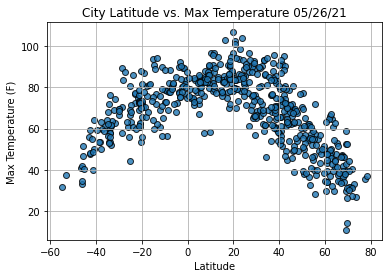

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")



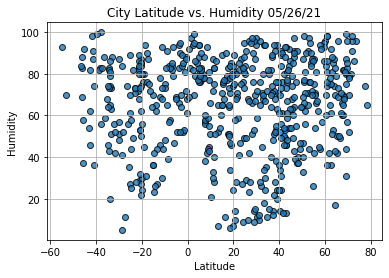

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")



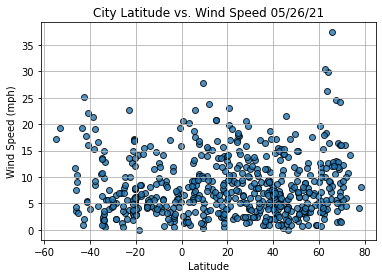

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)    

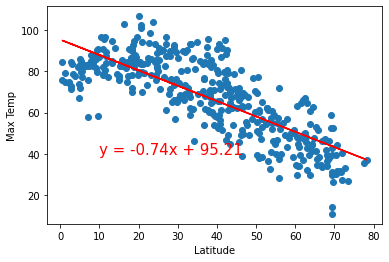

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere', 'Max Temp',(10,40))

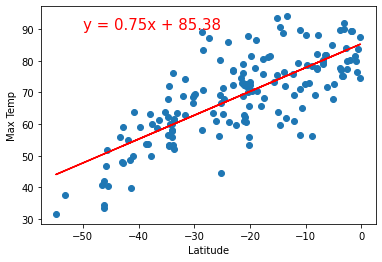

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

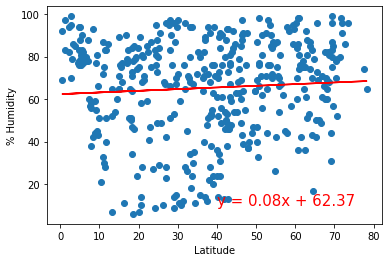

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

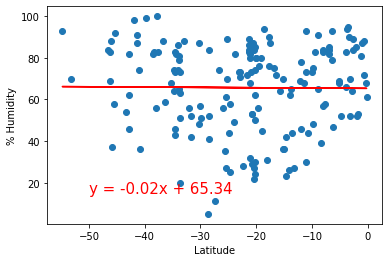

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

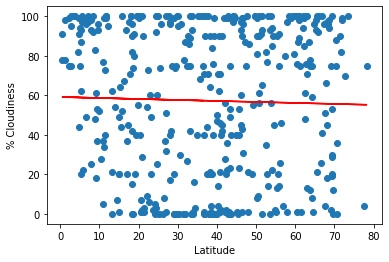

In [51]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Cloudiness',(-50,15))

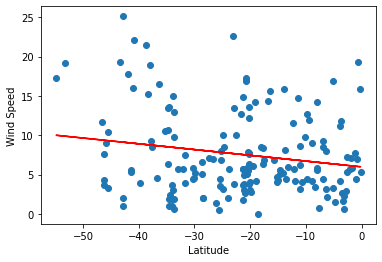

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))